<a href="https://colab.research.google.com/github/iamharkirat/BMI598/blob/main/P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic CNN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report


Loading CIFAR-10 dataset...
Normalizing the images...
Converting labels to one-hot encoding...
Defining the model...
Model compiled.
Starting model training...
Epoch 1/10
1250/1250 [==============================] - 19s 8ms/step - loss: 1.4075 - accuracy: 0.4977 - val_loss: 1.1854 - val_accuracy: 0.5803
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9997 - accuracy: 0.6504 - val_loss: 1.0205 - val_accuracy: 0.6395
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7579 - accuracy: 0.7345 - val_loss: 1.0371 - val_accuracy: 0.6542
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5385 - accuracy: 0.8132 - val_loss: 1.1427 - val_accuracy: 0.6415
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3373 - accuracy: 0.8838 - val_loss: 1.3069 - val_accuracy: 0.6481
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1915 - accuracy: 0.9344 - val_loss: 1.71

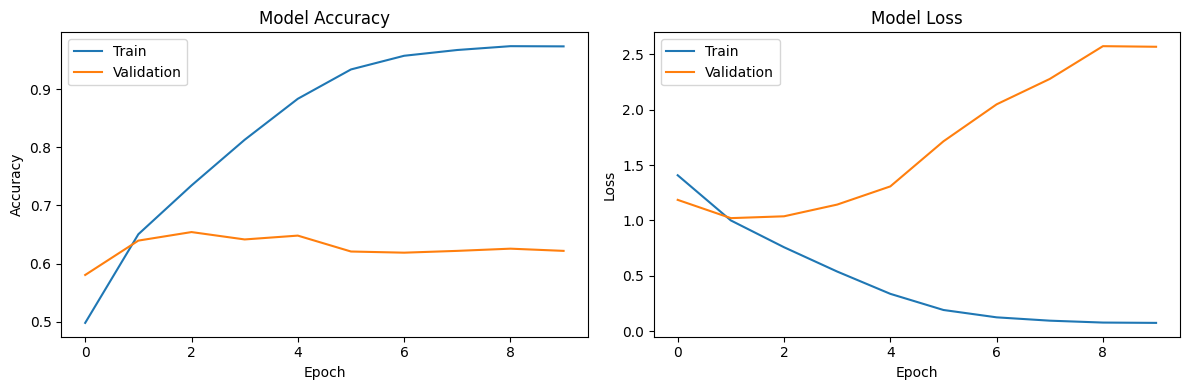

Computing classification metrics...
313/313 [==============================] - 1s 3ms/step


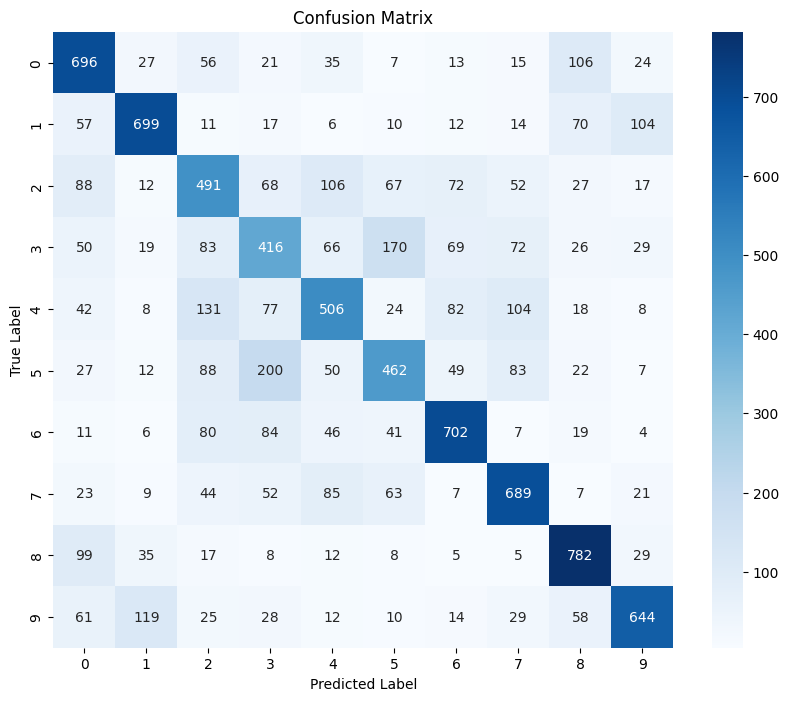

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.70      0.65      1000
           1       0.74      0.70      0.72      1000
           2       0.48      0.49      0.48      1000
           3       0.43      0.42      0.42      1000
           4       0.55      0.51      0.53      1000
           5       0.54      0.46      0.50      1000
           6       0.68      0.70      0.69      1000
           7       0.64      0.69      0.67      1000
           8       0.69      0.78      0.73      1000
           9       0.73      0.64      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [2]:
# ---------------------- Data Preparation ---------------------- #
print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Normalizing the images...")
# Normalize the image data to range [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Converting labels to one-hot encoding...")
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ---------------------- Model Definition ---------------------- #
print("Defining the model...")
model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Flattening and fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# ---------------------- Model Compilation ---------------------- #
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled.")

# ---------------------- Training the Model ---------------------- #
print("Starting model training...")
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2
)
print("Model training complete.")

# ---------------------- Evaluating the Model ---------------------- #
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# ---------------------- Visualization ---------------------- #
# Plotting training & validation accuracy and loss values
print("Visualizing training and validation metrics...")
plt.figure(figsize=(12, 4))

# Plotting accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# ---------------------- Classification Metrics ---------------------- #
print("Computing classification metrics...")
# Predicting classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generating and visualizing the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


## Phase 2: Adding Pooling Layers

Model defined.
Model compiled.
Starting model training...
Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 1.4772 - accuracy: 0.4662 - val_loss: 1.3460 - val_accuracy: 0.5284
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1286 - accuracy: 0.6039 - val_loss: 1.0841 - val_accuracy: 0.6192
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9836 - accuracy: 0.6563 - val_loss: 0.9945 - val_accuracy: 0.6525
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8872 - accuracy: 0.6924 - val_loss: 0.9484 - val_accuracy: 0.6750
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8056 - accuracy: 0.7204 - val_loss: 0.9259 - val_accuracy: 0.6863
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7309 - accuracy: 0.7440 - val_loss: 0.9535 - val_accuracy: 0.6754
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.

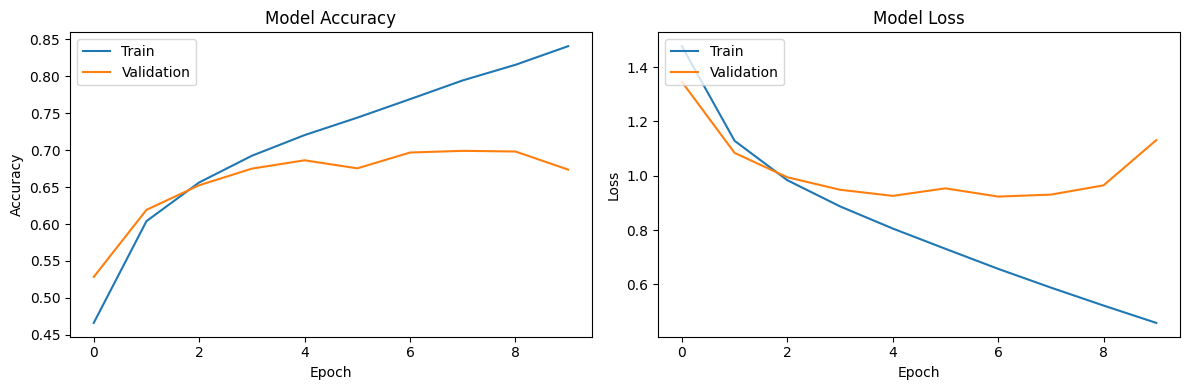

313/313 [==============================] - 1s 2ms/step


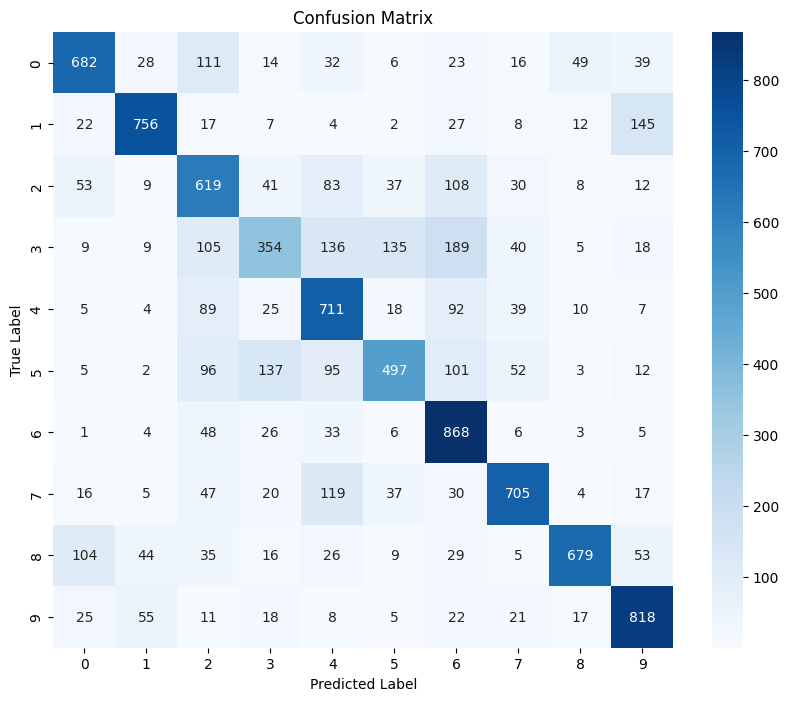

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.83      0.76      0.79      1000
           2       0.53      0.62      0.57      1000
           3       0.54      0.35      0.43      1000
           4       0.57      0.71      0.63      1000
           5       0.66      0.50      0.57      1000
           6       0.58      0.87      0.70      1000
           7       0.76      0.70      0.73      1000
           8       0.86      0.68      0.76      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [3]:
# ---------------------- Model Definition ---------------------- #
# Building a simpler CNN model
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flattening and fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print("Model defined.")

# ---------------------- Model Compilation ---------------------- #
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled.")

# ---------------------- Training the Model ---------------------- #
print("Starting model training...")
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2
)
print("Model training complete.")

# ---------------------- Evaluating the Model ---------------------- #
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# ---------------------- Visualization ---------------------- #
# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plotting accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# ---------------------- Classification Metrics ---------------------- #
# Predicting classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generating and visualizing the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

## Phase 3: Adding Dropout

Data augmentation settings initialized.
Data augmentation fitted to training data.
Model defined.
Model compiled.
Starting model training with data augmentation...
Epoch 1/30
782/782 [==============================] - 40s 43ms/step - loss: 1.6111 - accuracy: 0.4437 - val_loss: 1.2700 - val_accuracy: 0.5502
Epoch 2/30
782/782 [==============================] - 35s 45ms/step - loss: 1.1740 - accuracy: 0.5823 - val_loss: 1.0318 - val_accuracy: 0.6317
Epoch 3/30
782/782 [==============================] - 34s 44ms/step - loss: 1.0381 - accuracy: 0.6336 - val_loss: 1.4272 - val_accuracy: 0.5393
Epoch 4/30
782/782 [==============================] - 34s 43ms/step - loss: 0.9600 - accuracy: 0.6628 - val_loss: 1.4487 - val_accuracy: 0.5553
Epoch 5/30
782/782 [==============================] - 33s 43ms/step - loss: 0.8976 - accuracy: 0.6848 - val_loss: 0.9226 - val_accuracy: 0.6891
Epoch 6/30
782/782 [==============================] - 34s 43ms/step - loss: 0.8497 - accuracy: 0.7012 - val_loss: 0.

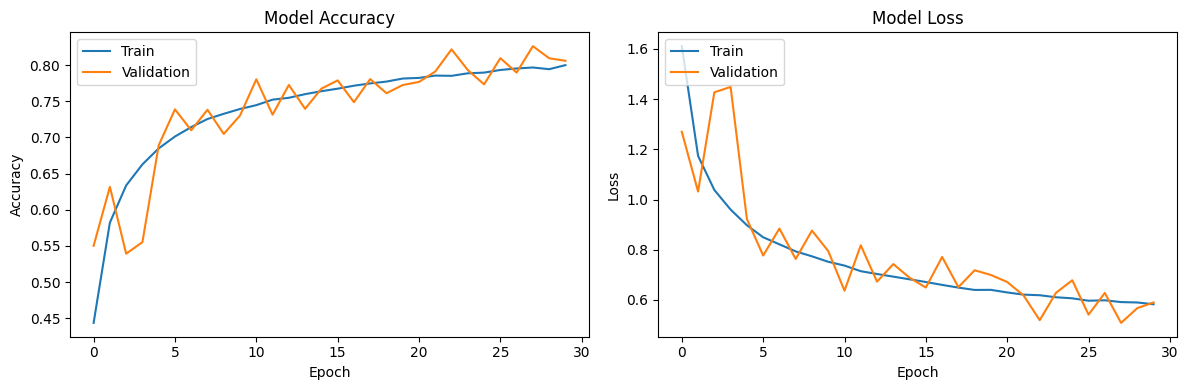

313/313 [==============================] - 1s 2ms/step


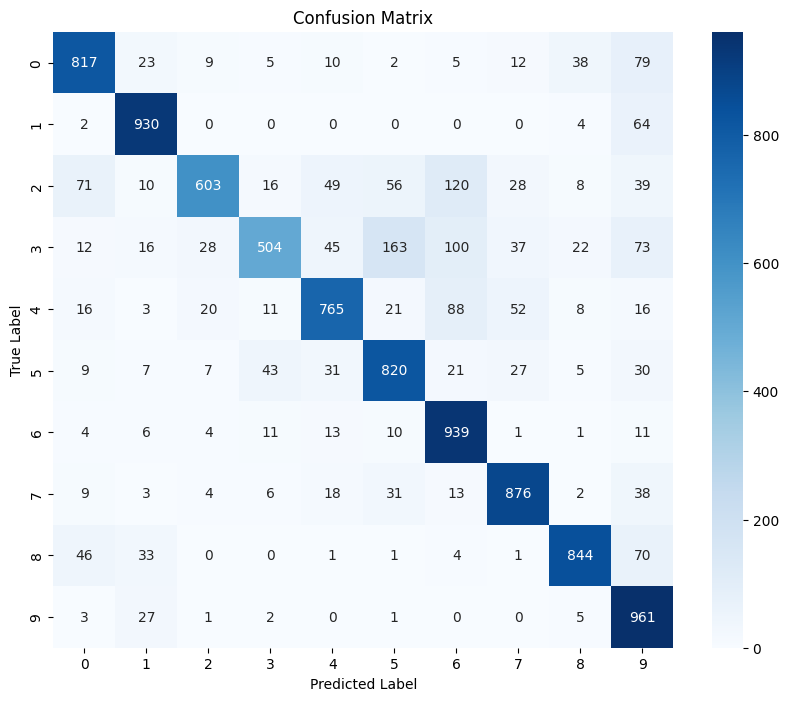

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.88      0.93      0.90      1000
           2       0.89      0.60      0.72      1000
           3       0.84      0.50      0.63      1000
           4       0.82      0.77      0.79      1000
           5       0.74      0.82      0.78      1000
           6       0.73      0.94      0.82      1000
           7       0.85      0.88      0.86      1000
           8       0.90      0.84      0.87      1000
           9       0.70      0.96      0.81      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



In [4]:
# ---------------------- Data Augmentation ---------------------- #
# Setting up Image Data Generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
print("Data augmentation settings initialized.")
datagen.fit(X_train)
print("Data augmentation fitted to training data.")

# ---------------------- Model Definition ---------------------- #
# Building the CNN model
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # Fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

print("Model defined.")

# ---------------------- Model Compilation ---------------------- #
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled.")

# ---------------------- Training the Model ---------------------- #
print("Starting model training with data augmentation...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test)
)
print("Model training complete.")

# ---------------------- Evaluating the Model ---------------------- #
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# ---------------------- Visualization ---------------------- #
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# ---------------------- Classification Metrics ---------------------- #
# Predicting classes for the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generating and visualizing the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

## Phase 4: Transfer Learning with ShuffleNet

Using device: cuda:0
Loaded pre-trained ShuffleNet model


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Files already downloaded and verified
Starting training...
Epoch 1/20, Train Loss: 2.2776, Train Acc: 20.33%, Val Loss: 2.2408, Val Acc: 30.87%
Epoch 2/20, Train Loss: 2.1550, Train Acc: 35.86%, Val Loss: 2.0512, Val Acc: 40.29%
Epoch 3/20, Train Loss: 1.9326, Train Acc: 44.05%, Val Loss: 1.8112, Val Acc: 47.89%
Epoch 4/20, Train Loss: 1.6477, Train Acc: 50.05%, Val Loss: 1.5064, Val Acc: 52.57%
Epoch 5/20, Train Loss: 1.3584, Train Acc: 55.96%, Val Loss: 1.2630, Val Acc: 58.08%
Epoch 6/20, Train Loss: 1.1427, Train Acc: 61.62%, Val Loss: 1.1044, Val Acc: 62.62%
Epoch 7/20, Train Loss: 1.0117, Train Acc: 65.54%, Val Loss: 1.0182, Val Acc: 65.04%
Epoch 8/20, Train Loss: 0.9157, Train Acc: 68.88%, Val Loss: 0.9636, Val Acc: 66.79%
Epoch 9/20, Train Loss: 0.8468, Train Acc: 71.17%, Val Loss: 0.9187, Val Acc: 68.41%
Epoch 10/20, Train Loss: 0.7976, Train Acc: 72.82%, Val Loss: 0.8860, Val Acc: 69.82%
Epoch 11/20, Train Loss: 0.7470, Train Acc: 74.45%, 

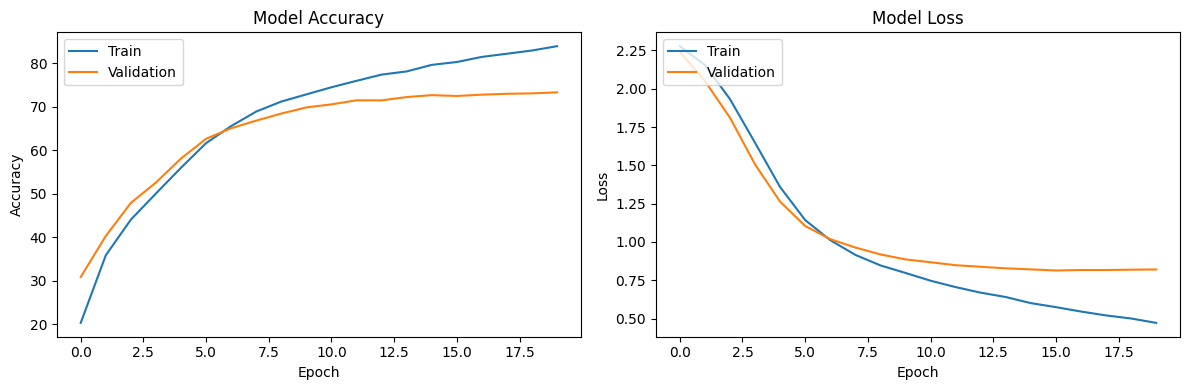

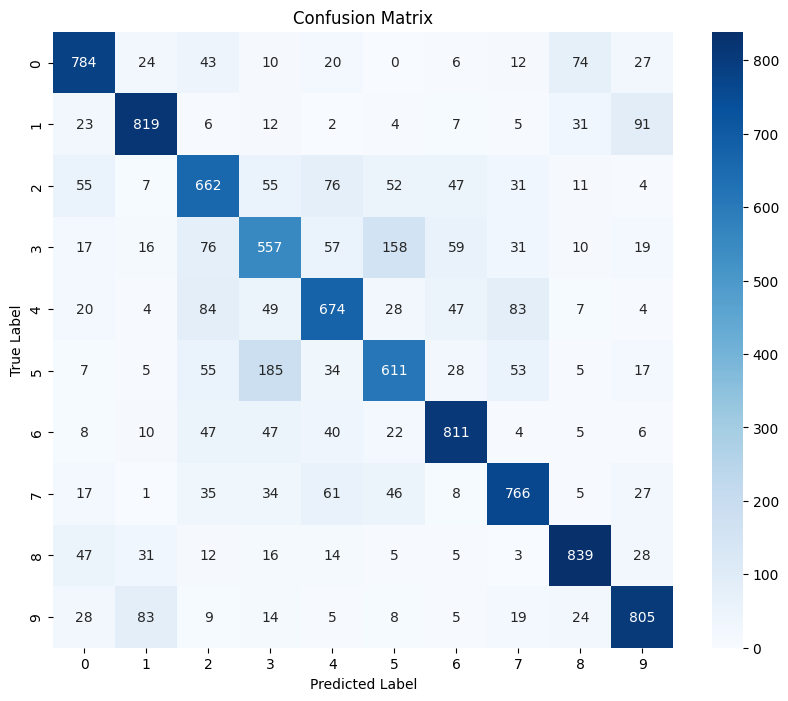

Classification Report:
               precision    recall  f1-score   support

     class_0       0.78      0.78      0.78      1000
     class_1       0.82      0.82      0.82      1000
     class_2       0.64      0.66      0.65      1000
     class_3       0.57      0.56      0.56      1000
     class_4       0.69      0.67      0.68      1000
     class_5       0.65      0.61      0.63      1000
     class_6       0.79      0.81      0.80      1000
     class_7       0.76      0.77      0.76      1000
     class_8       0.83      0.84      0.83      1000
     class_9       0.78      0.81      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Check device availability and set it
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the ShuffleNet model
shufflenet_model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
print("Loaded pre-trained ShuffleNet model")

# Modify the last fully connected layer to match CIFAR-10 class count
num_ftrs = shufflenet_model.fc.in_features
shufflenet_model.fc = nn.Linear(num_ftrs, 10)

# Transfer the model to the designated device
shufflenet_model.to(device)

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
batch_size = 64
root = './data'
trainset = torchvision.datasets.CIFAR10(root=root, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root=root, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Loss and optimizer setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(shufflenet_model.parameters(), lr=0.001, momentum=0.9)

# Placeholders for loss and accuracy data
train_losses, train_accuracy, val_losses, val_accuracy = [], [], [], []

# Model training
num_epochs = 20
print("Starting training...")
for epoch in range(num_epochs):
    # Training loop
    running_loss, correct_train, total_train = 0.0, 0, 0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = shufflenet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate stats
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct_train / total_train

    # Validation loop
    val_loss, correct_val, total_val = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = shufflenet_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(testloader)
    val_acc = 100 * correct_val / total_val

    # Store and print epoch stats
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)
    val_losses.append(val_loss)
    val_accuracy.append(val_acc)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print("Training finished!")

# Evaluate on the test set
correct_test, total_test = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = shufflenet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Prediction and confusion matrix
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = shufflenet_model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_names = [f'class_{i}' for i in range(10)]
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))
